In [15]:
#s1 import required librsries
import pandas as pd
import numpy as np

#s2 load dataset
df=pd.read_csv(r"D:\GQT\loan_data.csv")
df.head()


,age,income,credit_score,loan_amount,approval_status
0,59,40358,302,191626,0
1,49,23267,662,150271,0
2,35,102745,807,123533,1
3,63,109588,573,479628,0
4,28,58513,805,449164,0


In [17]:
# 3️⃣ Features and Target Separation

X = df[['age', 'income', 'credit_score', 'loan_amount']]
y = df['approval_status']   # 1 = approved, 0 = rejected


In [19]:
df

,age,income,credit_score,loan_amount,approval_status
0,59,40358,302,191626,0
1,49,23267,662,150271,0
2,35,102745,807,123533,1
3,63,109588,573,479628,0
4,28,58513,805,449164,0
...,...,...,...,...,...
495,46,24621,629,395411,0
496,30,35034,406,254474,0
497,46,131927,525,184436,0
498,54,147858,517,497049,0


In [21]:
#s4 train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [22]:
df

,age,income,credit_score,loan_amount,approval_status
0,59,40358,302,191626,0
1,49,23267,662,150271,0
2,35,102745,807,123533,1
3,63,109588,573,479628,0
4,28,58513,805,449164,0
...,...,...,...,...,...
495,46,24621,629,395411,0
496,30,35034,406,254474,0
497,46,131927,525,184436,0
498,54,147858,517,497049,0


In [23]:
#s5 train Losgistic Regression Model

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression (max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [96]:
#s6 prediction & evalution

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_log = log_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n",classification_report(y_test,y_pred_log))
print("Accuracy:",accuracy_score(y_test,y_pred_log))


Confusion Matrix:
 [[72  6]
 [ 3 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.76      0.86      0.81        22

    accuracy                           0.91       100
   macro avg       0.86      0.89      0.87       100
weighted avg       0.92      0.91      0.91       100

Accuracy: 0.91


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [100]:
#s8 Train KNN with Different K values

K = 3
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)

y_pred_knn3 = knn3.predict(X_test_scaled)
print("K=3 Accuracy:",accuracy_score(y_test,y_pred_knn3))

K=3 Accuracy: 0.9


In [102]:
K = 5  
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)

y_pred_knn5 = knn5.predict(X_test_scaled)
print("K=5 Accuracy:",accuracy_score(y_test,y_pred_knn5))

K=5 Accuracy: 0.9


In [104]:
K = 7  
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, y_train)

y_pred_knn7 = knn7.predict(X_test_scaled)
print("K=7 Accuracy:",accuracy_score(y_test,y_pred_knn7))

K=7 Accuracy: 0.89


In [106]:
#s9 Train Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
                                  

DecisionTreeClassifier(random_state=42)

In [111]:
#s10 Prediction and Evalution
y_pred_dt = dt_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n",classification_report(y_test,y_pred_dt))
print("Accuracy:",accuracy_score(y_test,y_pred_dt))


Confusion Matrix:
 [[75  3]
 [ 3 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.86      0.86      0.86        22

    accuracy                           0.94       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.94      0.94      0.94       100

Accuracy: 0.94


In [113]:
#s11 Model Comparison Summary

results = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN {Best K)', 
             'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        max(
            accuracy_score(y_test, y_pred_knn3),
            accuracy_score(y_test, y_pred_knn5),
            accuracy_score(y_test, y_pred_knn7)
        ),
        accuracy_score(y_test, y_pred_dt),
    ]
})
results

,Model,Accuracy
0,Logistic Regression,0.91
1,KNN {Best K),0.90
2,Decision Tree,0.94


In [119]:
#s12 save Predictions (Assignment Requirement)
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred_dt

df_test.to_csv(r"D:\GQT\loan_predictions.csv", index=False)


In [121]:
#1 Confusion Matrix Visualization (Most Importent)
#logistic Regression

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm_log = confusion_matrix(y_test,y_pred_log)



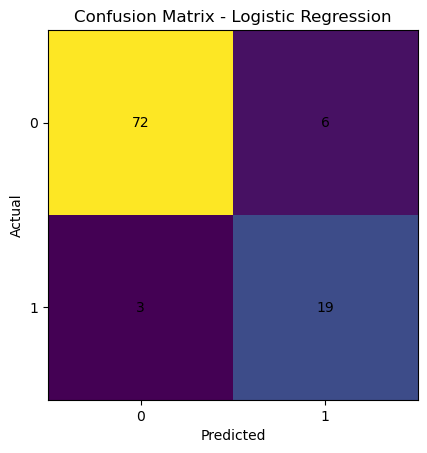

In [124]:
plt.figure()
plt.imshow(cm_log)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1])
plt.yticks([0,1])

for i in range(2):
    for j in range(2):
        plt.text(j,i,cm_log[i,j],ha="center", va="center")

plt.show()
